In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 한글 폰트 사용
# 폰트 설정
mpl.rc('font', family='Malgun Gothic') #family에 사용할 폰트를 넣음
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

## 우리나라 인구 소멸 위기 지역 분석

In [2]:
import platform

path = "c:/Windows/Fonts/malgun.ttf"

In [3]:
population = pd.read_csv('./data/성별, 연령별 인구 - 시군구(2019).csv', sep=',', encoding='euc-kr')
population.head()

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,서울,소계,NaN,계,9096901,983091,402343,548245,768413,687804,...,677660,782455,731258,728273,664875,465250,370242,280007,163363,96792
1,서울,소계,NaN,남자,4386287,505543,201751,233761,377349,341858,...,335606,385491,354886,349208,313417,218378,170303,126711,66754,30757
2,서울,소계,NaN,여자,4710614,477548,200592,314484,391064,345946,...,342054,396964,376372,379065,351458,246872,199939,153296,96609,66035
3,서울,종로구,NaN,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747


In [4]:
# 결측치를 nan처리 하지 않고, 그 앞의 내용들로 채우게끔 처리
# 즉, method = 'pad'로 설정해서 결측치를 앞 방향으로 채우기
population.fillna(' ',inplace=True)
population.head()

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,서울,소계,,계,9096901,983091,402343,548245,768413,687804,...,677660,782455,731258,728273,664875,465250,370242,280007,163363,96792
1,서울,소계,,남자,4386287,505543,201751,233761,377349,341858,...,335606,385491,354886,349208,313417,218378,170303,126711,66754,30757
2,서울,소계,,여자,4710614,477548,200592,314484,391064,345946,...,342054,396964,376372,379065,351458,246872,199939,153296,96609,66035
3,서울,종로구,,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747


In [5]:
population.rename(columns= {'합계':'인구수'}, inplace=True)
population.head()

,광역시도,시군구,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,서울,소계,,계,9096901,983091,402343,548245,768413,687804,...,677660,782455,731258,728273,664875,465250,370242,280007,163363,96792
1,서울,소계,,남자,4386287,505543,201751,233761,377349,341858,...,335606,385491,354886,349208,313417,218378,170303,126711,66754,30757
2,서울,소계,,여자,4710614,477548,200592,314484,391064,345946,...,342054,396964,376372,379065,351458,246872,199939,153296,96609,66035
3,서울,종로구,,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747


In [6]:
# '시군구'컬럼에서 소계 부분 제외
population = population[(population['시군구'] != '소계')]
population = population[(population['행정구'] != '소계')]
population.head()

,광역시도,시군구,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
3,서울,종로구,,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747
5,서울,종로구,,여자,71055,6021,2998,5586,5805,4712,...,4693,6075,5951,6008,5104,3688,3301,2987,1954,1318
6,서울,중구,,계,115665,9839,3896,7511,10304,9636,...,7836,8903,9313,9786,9002,6211,5077,4201,2581,1695
7,서울,중구,,남자,55820,4988,1896,3103,5115,4790,...,4054,4423,4587,4830,4430,2998,2295,1795,1003,523


In [7]:
# 계를 합계로 변경/ 데이터 처리에서 copy 관련 warning을 피하기 위해 .copy() 옵션으로 재지정
population.is_copy = False
population.loc[population['구분'] == '계', '구분'] = '합계'
population.head()

,광역시도,시군구,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
3,서울,종로구,,합계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747
5,서울,종로구,,여자,71055,6021,2998,5586,5805,4712,...,4693,6075,5951,6008,5104,3688,3301,2987,1954,1318
6,서울,중구,,합계,115665,9839,3896,7511,10304,9636,...,7836,8903,9313,9786,9002,6211,5077,4201,2581,1695
7,서울,중구,,남자,55820,4988,1896,3103,5115,4790,...,4054,4423,4587,4830,4430,2998,2295,1795,1003,523


In [8]:
"""population['시군구'] = population['시군구'].replace(' ', '')
population['행정구'] = population['행정구'].replace(' ', '')
population.head()"""

"population['시군구'] = population['시군구'].replace(' ', '')\npopulation['행정구'] = population['행정구'].replace(' ', '')\npopulation.head()"

## 인구 소멸 위기 지역 계산하고 데이터 정리

In [9]:
population['20-39세'] = population['20~24세'] + population['25~29세'] + population['30~34세'] + population['35~39세']
population['65세이상'] = population['65~69세'] + population['70~74세'] + population['75~79세'] + population['80~84세'] + population['85세이상']
population.head(10)

,광역시도,시군구,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,20-39세,65세이상
3,서울,종로구,,합계,136649,12204,5801,9816,11972,9459,...,11462,11781,10125,7057,5960,5277,3341,2065,40758,23700
4,서울,종로구,,남자,65594,6183,2803,4230,6167,4747,...,5511,5773,5021,3369,2659,2290,1387,747,19801,10452
5,서울,종로구,,여자,71055,6021,2998,5586,5805,4712,...,5951,6008,5104,3688,3301,2987,1954,1318,20957,13248
6,서울,중구,,합계,115665,9839,3896,7511,10304,9636,...,9313,9786,9002,6211,5077,4201,2581,1695,37325,19765
7,서울,중구,,남자,55820,4988,1896,3103,5115,4790,...,4587,4830,4430,2998,2295,1795,1003,523,17998,8614
8,서울,중구,,여자,59845,4851,2000,4408,5189,4846,...,4726,4956,4572,3213,2782,2406,1578,1172,19327,11151
9,서울,용산구,,합계,204196,19559,7501,11472,17506,17246,...,16489,16246,14708,9927,8197,7027,4763,3009,64265,32923
10,서울,용산구,,남자,97390,10065,3759,4330,8410,8569,...,8072,7884,7103,4649,3653,2997,1831,998,30377,14128
11,서울,용산구,,여자,106806,9494,3742,7142,9096,8677,...,8417,8362,7605,5278,4544,4030,2932,2011,33888,18795
12,서울,성동구,,합계,283330,30197,10671,18283,24581,23496,...,22648,23060,20026,13394,10709,8671,5088,2895,91871,40757


In [10]:
pop = pd.pivot_table(population,
            index= ['광역시도', '시군구','행정구'],
            columns= ['구분'],
            values= ['인구수','20-39세','65세이상'])
pop.head()

20-39세                65세이상                   인구수          \
구분                남자     여자     합계     남자     여자     합계      남자      여자   
광역시도 시군구  행정구                                                             
강원    강릉시      25015  20993  46008  17378  23119  40497  101154  101903   
      고성군       2307   1699   4006   2957   4048   7005   11933   11688   
      동해시       8801   7510  16311   7075   9077  16152   42093   41795   
      삼척시       7148   5280  12428   6314   8639  14953   31630   30203   
      속초시       8517   7411  15928   5866   8144  14010   37488   38814   

                       
구분                 합계  
광역시도 시군구  행정구          
강원    강릉시      203057  
      고성군       23621  
      동해시       83888  
      삼척시       61833  
      속초시       76302

In [11]:
# 인구 소멸비율 계산
pop['소멸비율'] = pop['20-39세','여자'] / (pop['65세이상','합계'] / 2)
pop.head()

20-39세                65세이상                   인구수          \
구분                남자     여자     합계     남자     여자     합계      남자      여자   
광역시도 시군구  행정구                                                             
강원    강릉시      25015  20993  46008  17378  23119  40497  101154  101903   
      고성군       2307   1699   4006   2957   4048   7005   11933   11688   
      동해시       8801   7510  16311   7075   9077  16152   42093   41795   
      삼척시       7148   5280  12428   6314   8639  14953   31630   30203   
      속초시       8517   7411  15928   5866   8144  14010   37488   38814   

                           소멸비율  
구분                 합계            
광역시도 시군구  행정구                    
강원    강릉시      203057  1.036768  
      고성군       23621  0.485082  
      동해시       83888  0.929916  
      삼척시       61833  0.706213  
      속초시       76302  1.057959

In [12]:
# 인구 소멸위기 지역 계산
# 소멸비율이 1 이하면 소멸 위기지역이라고 기록
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20-39세                65세이상                   인구수          \
구분                남자     여자     합계     남자     여자     합계      남자      여자   
광역시도 시군구  행정구                                                             
강원    강릉시      25015  20993  46008  17378  23119  40497  101154  101903   
      고성군       2307   1699   4006   2957   4048   7005   11933   11688   
      동해시       8801   7510  16311   7075   9077  16152   42093   41795   
      삼척시       7148   5280  12428   6314   8639  14953   31630   30203   
      속초시       8517   7411  15928   5866   8144  14010   37488   38814   

                           소멸비율 소멸위기지역  
구분                 합계                   
광역시도 시군구  행정구                           
강원    강릉시      203057  1.036768  False  
      고성군       23621  0.485082   True  
      동해시       83888  0.929916   True  
      삼척시       61833  0.706213   True  
      속초시       76302  1.057959  False

In [13]:
## df.index.get_level_values(level = None) 또는 df.index.get_level_values('컬럼명')
## df.index.get_level_values(level = 1): df라는 데이터 프레임에서 두 번째 인덱스에 대한 값들을 가져오겠다는 의미
## df.index.get_level_values('A'): df라는 데이터 프레임에서 'A'라는 컬럼의 값들을 가져오겠다는 의미

# 소멸위기 분류된 지역 리스트로 뽑기
pop[pop['소멸위기지역'] == True].index.get_level_values(1)

Index([' 고성군', ' 동해시', ' 삼척시', ' 양구군', ' 양양군', ' 영월군', ' 인제군', ' 정선군', ' 철원군',
       ' 태백시', ' 평창군', ' 홍천군', ' 화천군', ' 횡성군', ' 가평군', ' 양평군', ' 여주시', ' 연천군',
       ' 거창군', ' 고성군', ' 남해군', ' 밀양시', ' 사천시', ' 산청군', ' 의령군', ' 창녕군', ' 하동군',
       ' 함안군', ' 함양군', ' 합천군', ' 경주시', ' 고령군', ' 군위군', ' 김천시', ' 문경시', ' 봉화군',
       ' 상주시', ' 성주군', ' 안동시', ' 영덕군', ' 영양군', ' 영주시', ' 영천시', ' 예천군', ' 울릉군',
       ' 울진군', ' 의성군', ' 청도군', ' 청송군', ' 동구', ' 영도구', ' 중구', ' 강화군', ' 옹진군',
       ' 강진군', ' 고흥군', ' 곡성군', ' 구례군', ' 담양군', ' 보성군', ' 신안군', ' 영광군', ' 영암군',
       ' 완도군', ' 장성군', ' 장흥군', ' 진도군', ' 함평군', ' 해남군', ' 화순군', ' 고창군', ' 김제시',
       ' 남원시', ' 무주군', ' 부안군', ' 순창군', ' 완주군', ' 임실군', ' 장수군', ' 정읍시', ' 진안군',
       ' 공주시', ' 금산군', ' 논산시', ' 보령시', ' 부여군', ' 서천군', ' 예산군', ' 청양군', ' 태안군',
       ' 홍성군', ' 괴산군', ' 단양군', ' 보은군', ' 영동군', ' 옥천군', ' 제천시'],
      dtype='object', name='시군구')

In [14]:
# reset_index를 사용하여 기존의 행 인덱스를 제거하고, 인덱스를 데이터 열로 추가
# 원래는 행 인덱스인 '광역시도'와 '시도'를 데이터의 컬럼(열)들로 추가
pop.reset_index(inplace=True)
pop.head()

광역시도   시군구 행정구 20-39세                65세이상                   인구수          \
구분                    남자     여자     합계     남자     여자     합계      남자      여자   
0    강원   강릉시      25015  20993  46008  17378  23119  40497  101154  101903   
1    강원   고성군       2307   1699   4006   2957   4048   7005   11933   11688   
2    강원   동해시       8801   7510  16311   7075   9077  16152   42093   41795   
3    강원   삼척시       7148   5280  12428   6314   8639  14953   31630   30203   
4    강원   속초시       8517   7411  15928   5866   8144  14010   37488   38814   

                소멸비율 소멸위기지역  
구분      합계                   
0   203057  1.036768  False  
1    23621  0.485082   True  
2    83888  0.929916   True  
3    61833  0.706213   True  
4    76302  1.057959  False

In [15]:
# 다단으로 구성된 index를 다시 초기화
tmp_columns = [pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n] for n in range(0, len(pop.columns.get_level_values(0)))]
# index가 초기화된 컬럼들로 다시 변경 = 다단으로 표시된 컬럼을 하나로 합침
pop.columns = tmp_columns
pop.head()

,광역시도,시군구,행정구,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원,강릉시,,25015,20993,46008,17378,23119,40497,101154,101903,203057,1.036768,False
1,강원,고성군,,2307,1699,4006,2957,4048,7005,11933,11688,23621,0.485082,True
2,강원,동해시,,8801,7510,16311,7075,9077,16152,42093,41795,83888,0.929916,True
3,강원,삼척시,,7148,5280,12428,6314,8639,14953,31630,30203,61833,0.706213,True
4,강원,속초시,,8517,7411,15928,5866,8144,14010,37488,38814,76302,1.057959,False


In [16]:
# 최종 정리된 데이터(pop)의 요약 정보를 확인해보기
# 인구수 관련 변수들은 '숫자형', '소멸위기지역' 변수는 'bool형'인 것을 확인
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      250 non-null    object 
 1   시군구       250 non-null    object 
 2   행정구       250 non-null    object 
 3   20-39세남자  250 non-null    int64  
 4   20-39세여자  250 non-null    int64  
 5   20-39세합계  250 non-null    int64  
 6   65세이상남자   250 non-null    int64  
 7   65세이상여자   250 non-null    int64  
 8   65세이상합계   250 non-null    int64  
 9   인구수남자     250 non-null    int64  
 10  인구수여자     250 non-null    int64  
 11  인구수합계     250 non-null    int64  
 12  소멸비율      250 non-null    float64
 13  소멸위기지역    250 non-null    bool   
dtypes: bool(1), float64(1), int64(9), object(3)
memory usage: 25.8+ KB


## 대한민국 지도 그리는 방법에 대한 소개

### 지도 시각화를 위해 지역별 고유 id만들기

In [17]:
pop['시군구'].unique()

array([' 강릉시', ' 고성군', ' 동해시', ' 삼척시', ' 속초시', ' 양구군', ' 양양군', ' 영월군',
       ' 원주시', ' 인제군', ' 정선군', ' 철원군', ' 춘천시', ' 태백시', ' 평창군', ' 홍천군',
       ' 화천군', ' 횡성군', ' 가평군', ' 고양시', ' 과천시', ' 광명시', ' 광주시', ' 구리시',
       ' 군포시', ' 김포시', ' 남양주시', ' 동두천시', ' 부천시', ' 성남시', ' 수원시', ' 시흥시',
       ' 안산시', ' 안성시', ' 안양시', ' 양주시', ' 양평군', ' 여주시', ' 연천군', ' 오산시',
       ' 용인시', ' 의왕시', ' 의정부시', ' 이천시', ' 파주시', ' 평택시', ' 포천시', ' 하남시',
       ' 화성시', ' 거제시', ' 거창군', ' 김해시', ' 남해군', ' 밀양시', ' 사천시', ' 산청군',
       ' 양산시', ' 의령군', ' 진주시', ' 창녕군', ' 창원시', ' 통영시', ' 하동군', ' 함안군',
       ' 함양군', ' 합천군', ' 경산시', ' 경주시', ' 고령군', ' 구미시', ' 군위군', ' 김천시',
       ' 문경시', ' 봉화군', ' 상주시', ' 성주군', ' 안동시', ' 영덕군', ' 영양군', ' 영주시',
       ' 영천시', ' 예천군', ' 울릉군', ' 울진군', ' 의성군', ' 청도군', ' 청송군', ' 칠곡군',
       ' 포항시', ' 광산구', ' 남구', ' 동구', ' 북구', ' 서구', ' 달서구', ' 달성군', ' 수성구',
       ' 중구', ' 대덕구', ' 유성구', ' 강서구', ' 금정구', ' 기장군', ' 동래구', ' 부산진구',
       ' 사상구', ' 사하구', ' 수영구', ' 연제구', ' 영도구', ' 해운대구', ' 강남구', ' 강동구'

In [18]:
# '시'를 담을 리스트를 len(pop)만큼 생성
si_name = [None] * len(pop)

In [19]:
for n in pop.index:
    if pop['시군구'][n][1:-1] == '고성':
        if pop['광역시도'][n] == '강원':
            si_name[n] = '고성(강원)'
        else:
            si_name[n] = '고성(경남)'


    elif pop['광역시도'][n] in ['서울', '인천', '울산', '부산', '대구', '대전', '광주']:
        if len(pop['시군구'][n]) == 3:
            si_name[n] = pop['광역시도'][n] + ' ' + pop['시군구'][n][1:]
        else:
            si_name[n] = pop['광역시도'][n] + ' ' + pop['시군구'][n][1:-1]

    elif pop['행정구'][n] == ' ':
        si_name[n] = pop['시군구'][n][1:-1]
    elif pop['행정구'][n] in [' 마산합포구', ' 마산회원구']:
        si_name[n] = pop['시군구'][n][1:-1] + ' ' + pop['행정구'][n][3:-1]
    elif len(pop['행정구'][n]) == 3:
        si_name[n] = pop['시군구'][n][1:-1] + ' ' + pop['행정구'][n][1:]
    else:
        si_name[n] = pop['시군구'][n][1:-1] + ' ' + pop['행정구'][n][1:-1]

In [20]:
print(si_name)

['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제', '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '고양 덕양', '고양 일산동', '고양 일산서', '과천', '광명', '광주', '구리', '군포', '김포', '남양주', '동두천', '부천', '성남 분당', '성남 수정', '성남 중원', '수원 권선', '수원 영통', '수원 장안', '수원 팔달', '시흥', '안산 단원', '안산 상록', '안성', '안양 동안', '안양 만안', '양주', '양평', '여주', '연천', '오산', '용인 기흥', '용인 수지', '용인 처인', '의왕', '의정부', '이천', '파주', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '밀양', '사천', '산청', '양산', '의령', '진주', '창녕', '창원 합포', '창원 회원', '창원 성산', '창원 의창', '창원 진해', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미', '군위', '김천', '문경', '봉화', '상주', '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성', '청도', '청송', '칠곡', '포항 남구', '포항 북구', '광주 광산', '광주 남구', '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서', '대구 달성', '대구 동구', '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕', '대전 동구', '대전 서구', '대전 유성', '대전 중구', '부산 강서', '부산 금정', '부산 기장', '부산 남구', '부산 동구', '부산 동래', '부산 부산진', '부산 북구', '부산 사상', '부산 사하', '부산 서구', '부산 수영', '부산 연제'

In [21]:
pop['ID'] = si_name

In [22]:
pop.head()

,광역시도,시군구,행정구,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원,강릉시,,25015,20993,46008,17378,23119,40497,101154,101903,203057,1.036768,False,강릉
1,강원,고성군,,2307,1699,4006,2957,4048,7005,11933,11688,23621,0.485082,True,고성(강원)
2,강원,동해시,,8801,7510,16311,7075,9077,16152,42093,41795,83888,0.929916,True,동해
3,강원,삼척시,,7148,5280,12428,6314,8639,14953,31630,30203,61833,0.706213,True,삼척
4,강원,속초시,,8517,7411,15928,5866,8144,14010,37488,38814,76302,1.057959,False,속초


In [23]:
del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']
pop.head()

,광역시도,시군구,행정구,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원,강릉시,,20993,46008,40497,101154,101903,203057,1.036768,False,강릉
1,강원,고성군,,1699,4006,7005,11933,11688,23621,0.485082,True,고성(강원)
2,강원,동해시,,7510,16311,16152,42093,41795,83888,0.929916,True,동해
3,강원,삼척시,,5280,12428,14953,31630,30203,61833,0.706213,True,삼척
4,강원,속초시,,7411,15928,14010,37488,38814,76302,1.057959,False,속초


## Cartogram으로 우리나라 지도 만들기

In [24]:
# 엑셀에서 표현한 대한민국 각 지역 그림 불러오기
draw_korea_ra = pd.read_excel('./data/draw_korea_raw(수정01).xlsx', encoding='EUC-KR')
draw_korea_ra

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,과천,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [25]:
# x,y좌표 찾기
draw_korea_st = pd.DataFrame(draw_korea_ra.stack())
draw_korea_st.reset_index(inplace=True)
draw_korea_st.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, inplace=True)
draw_korea_st

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [26]:
# 변수명 변경
draw_korea = draw_korea_st

In [27]:
BORDER_LINES = [
    [(5,1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], #서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), (12,7), (12,6), (11,6), (11,5), (12,5), (12,4), (11,4), (11,3)], #경기도
    [(8,10), (8,11), (6,11), (6,12)], #강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], #충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], #전라북도
    [(13,5), (13,6), (16,6)], #대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)],  #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], # 울산
    [(27,5), (27,6), (25,6)]
]

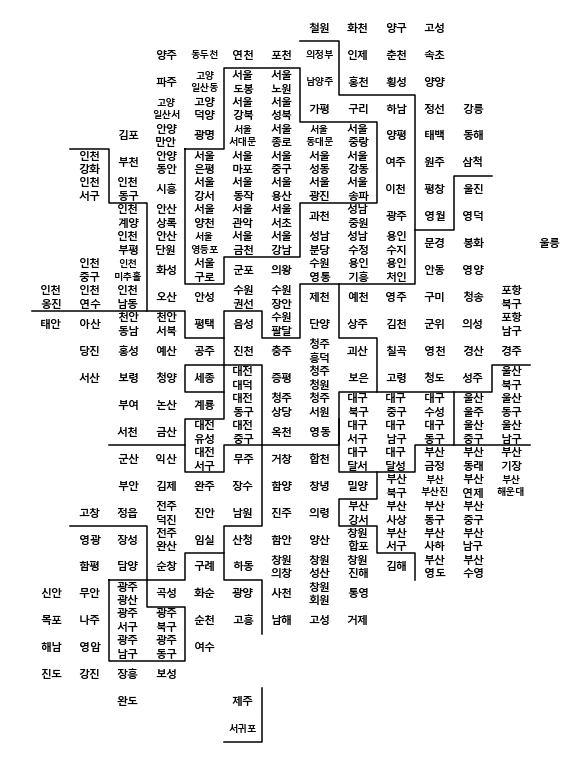

In [28]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    
    # annotate(): 그래프에 화살표를 그린후, 그 화살표에 문자열을 출력하는 기능을 수행
    plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight = 'bold',
                 fontsize = fontsize, ha = 'center', va = 'center', 
                 linespacing = linespacing)

# 시도 경계를 그림
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

# ivert_yaxis()는 y축이 엑셀에서 0번이 시작하는 것과 matplotlib이 0이라고 인식하는 좌표가 서로 반대이기 때문에 사용!
plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [29]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

set()

In [30]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)

print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))
set()

set()


set()

In [31]:
pop.head()

,광역시도,시군구,행정구,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원,강릉시,,20993,46008,40497,101154,101903,203057,1.036768,False,강릉
1,강원,고성군,,1699,4006,7005,11933,11688,23621,0.485082,True,고성(강원)
2,강원,동해시,,7510,16311,16152,42093,41795,83888,0.929916,True,동해
3,강원,삼척시,,5280,12428,14953,31630,30203,61833,0.706213,True,삼척
4,강원,속초시,,7411,15928,14010,37488,38814,76302,1.057959,False,속초


In [32]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])
pop.head()

,광역시도,시군구,행정구,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원,강릉시,,20993,46008,40497,101154,101903,203057,1.036768,False,강릉,3,11
1,강원,고성군,,1699,4006,7005,11933,11688,23621,0.485082,True,고성(강원),0,10
2,강원,동해시,,7510,16311,16152,42093,41795,83888,0.929916,True,동해,4,11
3,강원,삼척시,,5280,12428,14953,31630,30203,61833,0.706213,True,삼척,5,11
4,강원,속초시,,7411,15928,14010,37488,38814,76302,1.057959,False,속초,1,10


In [33]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                     min(blockedMap[targetData]))*0.25 + \
                     min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index = 'y', columns = 'x', values = targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize = (9, 11))
    plt.pcolor(masked_mapdata, vmin = vmin, vmax = vmax, cmap = cmapname, 
               edgecolor = '#aaaaaa', linewidth = 0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시 단위 이름도 같이 표시
        # (중구, 서구)
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # '서대문구', '서귀포시'와 같이 이름이 3자 이상인 경우에는 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        # annotate(): 그래프에 화살표를 그린후, 그 화살표에 문자열을 출력하는 기능을 수행
        plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight = 'bold',
                     fontsize = fontsize, ha = 'center', va = 'center', color = annocolor,
                     linespacing = linespacing)

    # '시도' 경계를 그려주기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c = 'black', lw = 2)
    
    # ivert_yaxis()는 y축이 엑셀에서 0번이 시작하는 것과 matplotlib이 0이라고 인식하는 좌표가 서로 반대이기 때문에 사용
    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink = 0.1, aspect = 10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

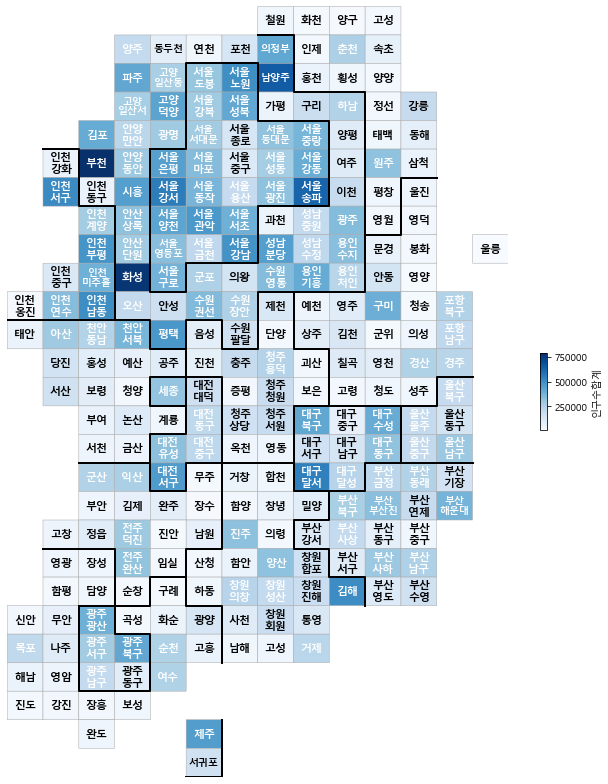

In [34]:
drawKorea('인구수합계', pop, 'Blues')

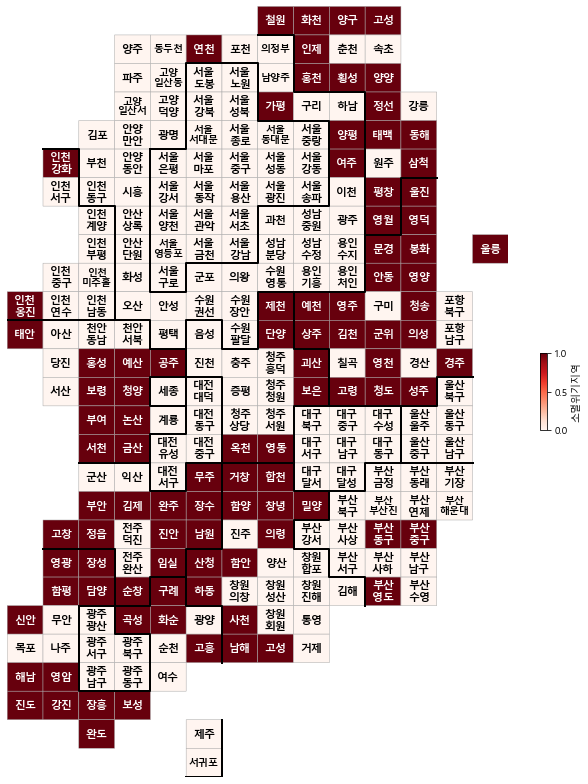

In [35]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

### 인구 현황에서 여성 인구 비율 확인하기

In [36]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([np.abs(min(blockedMap[targetData])), 
                   np.abs(max(blockedMap[targetData]))])
    
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index = 'y', columns = 'x', values = targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize = (9, 11))
    plt.pcolor(masked_mapdata, vmin = vmin, vmax = vmax, cmap = cmapname, 
               edgecolor = '#aaaaaa', linewidth = 0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시 단위 이름도 같이 표시!
        # (중구, 서구)
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # '서대문구', '서귀포시'와 같이 이름이 3자 이상인 경우에는 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        # annotate(): 그래프에 화살표를 그린후, 그 화살표에 문자열을 출력하는 기능을 수행
        plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight = 'bold',
                     fontsize = fontsize, ha = 'center', va = 'center', color = annocolor,
                     linespacing = linespacing)

    # '시도' 경계를 그려주기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c = 'black', lw = 2)
    
    # ivert_yaxis()는 y축이 엑셀에서 0번이 시작하는 것과 matplotlib이 0이라고 인식하는 좌표가 서로 반대이기 때문에 사용!
    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink = 0.1, aspect = 10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

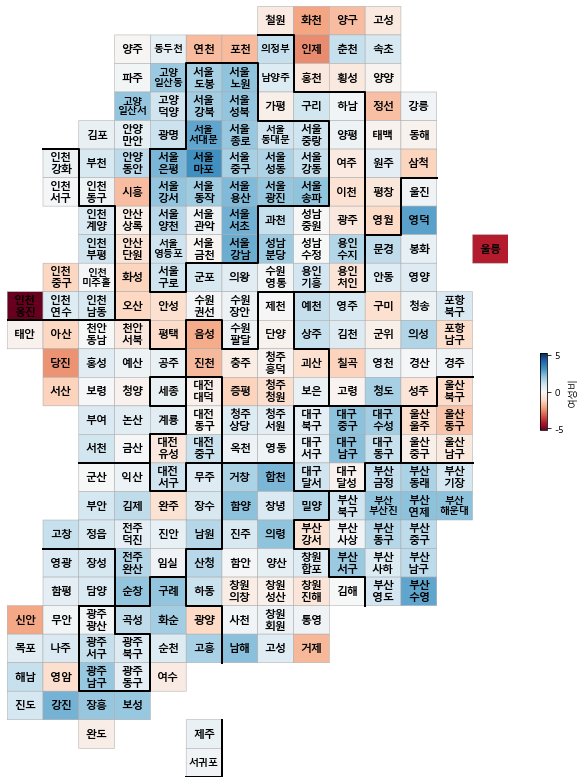

In [37]:
pop['여성비'] = (pop['인구수여자'] / pop['인구수합계'] - 0.5) * 100
drawKorea('여성비', pop, 'RdBu')

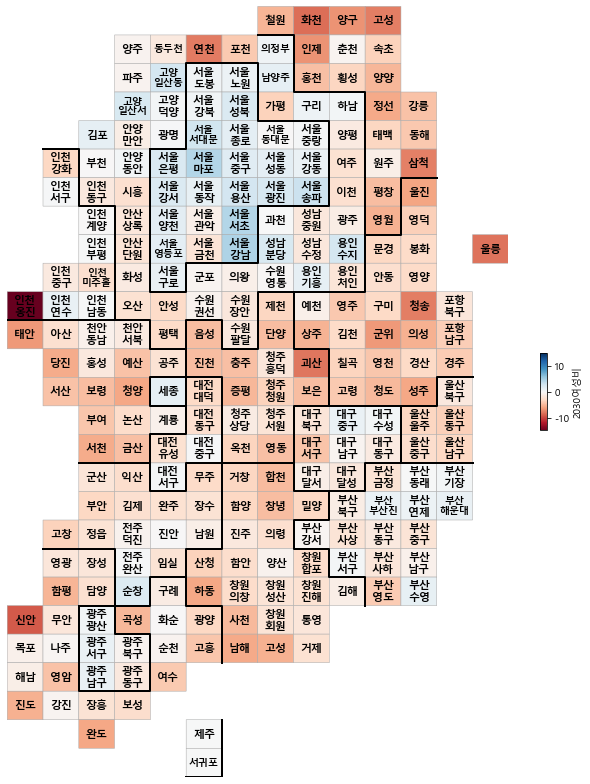

In [38]:
pop['2030여성비'] = (pop['20-39세여자'] / pop['20-39세합계'] - 0.5) * 100
drawKorea('2030여성비', pop, 'RdBu')

### folium에서 인구 소멸 위기 지역 표현

In [39]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시군구,행정구,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,,
강릉,강원,강릉시,,20993,46008,40497,101154,101903,203057,1.036768,0,3,11,0.184431,-4.370979
고성(강원),강원,고성군,,1699,4006,7005,11933,11688,23621,0.485082,1,0,10,-0.518606,-7.588617
동해,강원,동해시,,7510,16311,16152,42093,41795,83888,0.929916,1,4,11,-0.177618,-3.957452
삼척,강원,삼척시,,5280,12428,14953,31630,30203,61833,0.706213,1,5,11,-1.153915,-7.515288
속초,강원,속초시,,7411,15928,14010,37488,38814,76302,1.057959,0,1,10,0.868916,-3.471873


In [42]:
import folium
import json
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [44]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_data,
               data = pop_folium['인구수합계'],
               columns = [pop_folium.index, pop_folium['인구수합계']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>기초자치단체별 인구수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

### 소멸위기 지역

In [45]:
map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_data,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>소멸위기지역</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map